In [142]:
#ACHINTYA BHAVARAJU
#SE20UARI020
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

%config InlineBackend.figure_format = 'retina'

In [93]:
data = pd.read_csv(r'D:\OneDrive\Desktop\spam.csv',encoding='latin-1')

In [95]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [96]:
data = data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
data = data.rename(columns={"v1":"label", "v2":"text"})

In [97]:
data['label'] = data.label.map({'ham':0, 'spam':1})

In [98]:
data.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [90]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [99]:
data.label.value_counts()

0    4825
1     747
Name: label, dtype: int64

In [100]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [101]:
corpus = []
for i in range(0, len(data)):
    review = re.sub('[^a-zA-Z]', ' ', data['text'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [102]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(corpus).toarray()
y = data.iloc[:, 0].values

In [103]:
print(cv.get_feature_names()[0:20])
print(cv.get_feature_names()[-20:])

['aa', 'aah', 'aaniy', 'aaooooright', 'aathi', 'ab', 'abbey', 'abdomen', 'abeg', 'abel', 'aberdeen', 'abi', 'abil', 'abiola', 'abj', 'abl', 'abnorm', 'abouta', 'abroad', 'absenc']
['yunni', 'yuo', 'yuou', 'yup', 'yupz', 'zac', 'zaher', 'zealand', 'zebra', 'zed', 'zero', 'zf', 'zhong', 'zindgi', 'zoe', 'zogtoriu', 'zoom', 'zouk', 'zs', 'zyada']


In [104]:
print(X.shape,y.shape)

(5572, 6221) (5572,)


In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [106]:
print(X_train.shape,X_test.shape)

(4457, 6221) (1115, 6221)


In [107]:
from wordcloud import WordCloud

In [108]:
ham_words = ''
spam_words = ''
spam = data[data.label == 1]
ham = data[data.label ==0]

for val in spam.text:
    text = re.sub('[^a-zA-Z]', ' ', val)
    text = text.lower()
    text = text.split()
    ps = PorterStemmer()
    text = [ps.stem(word) for word in text if not word in set(stopwords.words('english'))]
    for words in text:
        spam_words = spam_words + words + ' '
    
for val in ham.text:
    text = re.sub('[^a-zA-Z]', ' ', val)
    text = text.lower()
    text = text.split()
    ps = PorterStemmer()
    text = [ps.stem(word) for word in text if not word in set(stopwords.words('english'))]
    for words in text:
          ham_words = ham_words + words + ' '

In [113]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [114]:
prediction["MultinomialNB"] = classifier.predict(X_test)
accuracy_score(y_test,prediction["MultinomialNB"])

0.979372197309417

In [116]:
conf_mat = confusion_matrix(y_test, prediction['MultinomialNB'])
conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]

Text(0.5, 15.0, 'Predicted label')

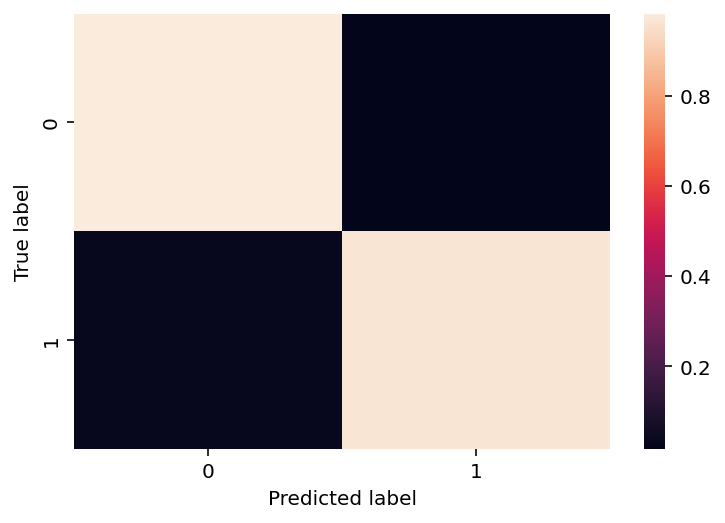

In [117]:
sns.heatmap(conf_mat_normalized)
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [118]:
print(conf_mat)

[[932  17]
 [  6 160]]


In [119]:
print(classification_report(y_test, prediction['MultinomialNB'], target_names = ["Ham", "Spam"]))

              precision    recall  f1-score   support

         Ham       0.99      0.98      0.99       949
        Spam       0.90      0.96      0.93       166

    accuracy                           0.98      1115
   macro avg       0.95      0.97      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [120]:
import random
import pprint, time
 
#download the treebank corpus from nltk
nltk.download('treebank')
 
#download the universal tagset from nltk
nltk.download('universal_tagset')
 
# reading the Treebank tagged sentences
nltk_data = list(nltk.corpus.treebank.tagged_sents(tagset='universal'))
 
#print the first two sentences along with tags
print(nltk_data[:2])

[nltk_data] Downloading package treebank to
[nltk_data]     C:\Users\achin\AppData\Roaming\nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\achin\AppData\Roaming\nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


[[('Pierre', 'NOUN'), ('Vinken', 'NOUN'), (',', '.'), ('61', 'NUM'), ('years', 'NOUN'), ('old', 'ADJ'), (',', '.'), ('will', 'VERB'), ('join', 'VERB'), ('the', 'DET'), ('board', 'NOUN'), ('as', 'ADP'), ('a', 'DET'), ('nonexecutive', 'ADJ'), ('director', 'NOUN'), ('Nov.', 'NOUN'), ('29', 'NUM'), ('.', '.')], [('Mr.', 'NOUN'), ('Vinken', 'NOUN'), ('is', 'VERB'), ('chairman', 'NOUN'), ('of', 'ADP'), ('Elsevier', 'NOUN'), ('N.V.', 'NOUN'), (',', '.'), ('the', 'DET'), ('Dutch', 'NOUN'), ('publishing', 'VERB'), ('group', 'NOUN'), ('.', '.')]]


In [121]:
train_set,test_set =train_test_split(nltk_data,test_size=0.20,random_state = 101)

In [122]:
train_tagged_words = [ tup for sent in train_set for tup in sent ]
test_tagged_words = [ tup for sent in test_set for tup in sent ]
print(len(train_tagged_words))
print(len(test_tagged_words))

80310
20366


In [123]:
tags = {tag for word,tag in train_tagged_words}
print(len(tags))
print(tags)
 
# check total words in vocabulary
vocab = {word for word,tag in train_tagged_words}

12
{'NUM', 'PRT', 'VERB', '.', 'ADJ', 'X', 'ADV', 'ADP', 'PRON', 'DET', 'CONJ', 'NOUN'}


In [124]:
def word_given_tag(word, tag, train_bag = train_tagged_words):
    tag_list = [pair for pair in train_bag if pair[1]==tag]
    count_tag = len(tag_list)#total number of times the passed tag occurred in train_bag
    w_given_tag_list = [pair[0] for pair in tag_list if pair[0]==word]
#now calculate the total number of times the passed word occurred as the passed tag.
    count_w_given_tag = len(w_given_tag_list)
 
     
    return (count_w_given_tag, count_tag)

In [125]:
def t2_given_t1(t2, t1, train_bag = train_tagged_words):
    tags = [pair[1] for pair in train_bag]
    count_t1 = len([t for t in tags if t==t1])
    count_t2_t1 = 0
    for index in range(len(tags)-1):
        if tags[index]==t1 and tags[index+1] == t2:
            count_t2_t1 += 1
    return (count_t2_t1, count_t1)

# creating t x t transition matrix of tags, t= no of tags
# Matrix(i, j) represents P(jth tag after the ith tag)
 
tags_matrix = np.zeros((len(tags), len(tags)), dtype='float32')
for i, t1 in enumerate(list(tags)):
    for j, t2 in enumerate(list(tags)): 
        tags_matrix[i, j] = t2_given_t1(t2, t1)[0]/t2_given_t1(t2, t1)[1]
 
print(tags_matrix)

[[1.84219927e-01 2.60621198e-02 2.07068902e-02 1.19243130e-01
  3.53445187e-02 2.02427700e-01 3.57015361e-03 3.74866128e-02
  1.42806140e-03 3.57015361e-03 1.42806144e-02 3.51660132e-01]
 [5.67514673e-02 1.17416831e-03 4.01174158e-01 4.50097844e-02
  8.29745606e-02 1.21330721e-02 9.39334650e-03 1.95694715e-02
  1.76125243e-02 1.01369865e-01 2.34833662e-03 2.50489235e-01]
 [2.28360966e-02 3.06629837e-02 1.67955801e-01 3.48066315e-02
  6.63904250e-02 2.15930015e-01 8.38858187e-02 9.23572779e-02
  3.55432779e-02 1.33609578e-01 5.43278083e-03 1.10589318e-01]
 [7.82104954e-02 2.78940029e-03 8.96899477e-02 9.23720598e-02
  4.61323895e-02 2.56410260e-02 5.25694676e-02 9.29084867e-02
  6.87694475e-02 1.72191828e-01 6.00793920e-02 2.18538776e-01]
 [2.17475723e-02 1.14563107e-02 1.14563107e-02 6.60194159e-02
  6.33009672e-02 2.09708735e-02 5.24271838e-03 8.05825219e-02
  1.94174761e-04 5.24271838e-03 1.68932043e-02 6.96893215e-01]
 [3.07514891e-03 1.85085520e-01 2.06419379e-01 1.60868734e-01
  1

In [126]:
tags_df = pd.DataFrame(tags_matrix, columns = list(tags), index=list(tags))
display(tags_df)

,NUM,PRT,VERB,.,ADJ,X,ADV,ADP,PRON,DET,CONJ,NOUN
NUM,0.184220,0.026062,0.020707,0.119243,0.035345,0.202428,0.003570,0.037487,0.001428,0.003570,0.014281,0.351660
PRT,0.056751,0.001174,0.401174,0.045010,0.082975,0.012133,0.009393,0.019569,0.017613,0.101370,0.002348,0.250489
VERB,0.022836,0.030663,0.167956,0.034807,0.066390,0.215930,0.083886,0.092357,0.035543,0.133610,0.005433,0.110589
.,0.078210,0.002789,0.089690,0.092372,0.046132,0.025641,0.052569,0.092908,0.068769,0.172192,0.060079,0.218539
ADJ,0.021748,0.011456,0.011456,0.066019,0.063301,0.020971,0.005243,0.080583,0.000194,0.005243,0.016893,0.696893
X,0.003075,0.185086,0.206419,0.160869,0.017682,0.075726,0.025754,0.142226,0.054200,0.056890,0.010379,0.061695
ADV,0.029868,0.014740,0.339022,0.139255,0.130721,0.022886,0.081458,0.119472,0.012025,0.071373,0.006982,0.032196
ADP,0.063275,0.001266,0.008479,0.038724,0.107062,0.034548,0.014553,0.016958,0.069603,0.320931,0.001012,0.323589
PRON,0.006834,0.014123,0.484738,0.041913,0.070615,0.088383,0.036902,0.022323,0.006834,0.009567,0.005011,0.212756
DET,0.022855,0.000287,0.040247,0.017393,0.206411,0.045134,0.012074,0.009918,0.003306,0.006037,0.000431,0.635906


In [127]:
def Viterbi(words, train_bag = train_tagged_words):
    state = []
    T = list(set([pair[1] for pair in train_bag]))
     
    for key, word in enumerate(words):
        #initialise list of probability column for a given observation
        p = [] 
        for tag in T:
            if key == 0:
                transition_p = tags_df.loc['.', tag]
            else:
                transition_p = tags_df.loc[state[-1], tag]
                 
            # compute emission and state probabilities
            emission_p = word_given_tag(words[key], tag)[0]/word_given_tag(words[key], tag)[1]
            state_probability = emission_p * transition_p    
            p.append(state_probability)
             
        pmax = max(p)
        # getting state for which probability is maximum
        state_max = T[p.index(pmax)] 
        state.append(state_max)
    return list(zip(words, state))

In [143]:
tagged_seq = Viterbi(test_tagged_words)
difference = end-start
 
print("Time taken in seconds: ", difference)
 
# accuracy
check = [i for i, j in zip(tagged_seq, test_run_base) if i == j] 

accuracy = len(check)/len(tagged_seq)
print('Viterbi Algorithm Accuracy: ',accuracy*100)

Time taken in seconds:  35.23859739303589
Viterbi Algorithm Accuracy:  93.77990430622009


In [144]:
tagged_seq[3][1]

'NUM'

In [138]:
y_test1=[]
y_pred1=[]
for i in range(0,len(tagged_seq)):
    y_pred1.append(tagged_seq[i][1])
    
for i in range(0,len(test_run_base)):
    y_test1.append(test_run_base[i][1])

In [139]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y_test1=le.fit_transform(y_test1)
y_pred1=le.transform(y_pred1)

In [140]:
print(classification_report(y_test1, y_pred1))
accuracy_score(y_test1, y_pred1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       0.78      0.88      0.82         8
           2       1.00      1.00      1.00        16
           3       0.91      0.91      0.91        11
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00        18
           6       1.00      0.89      0.94        62
           7       0.18      1.00      0.31         2
           8       1.00      1.00      1.00         5
           9       1.00      1.00      1.00         4
          10       0.97      0.91      0.94        35
          11       1.00      0.93      0.97        15

    accuracy                           0.94       209
   macro avg       0.90      0.96      0.91       209
weighted avg       0.97      0.94      0.95       209



0.937799043062201